In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
data = pd.read_csv('../../control_params_log.tsv', sep='\t', header=None, names=['model', 'lineage', 'lam_Va', 'lam_Pb', 'lam_Dab', 'abs', 'rms', 'R2'], index_col=None)

In [3]:
sub_data = data.loc[data['model'] == 'substitution_model']
tree_data = data.loc[data['model'] == 'tree_model']

sub_data.sort_values(by='abs', inplace=True)
tree_data.sort_values(by='abs', inplace=True)
print sub_data.head()
print tree_data.head()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                  model lineage  lam_Va  lam_Pb  lam_Dab    abs    rms     R2
218  substitution_model  dengue   1.500   1.875      2.5  0.516  0.688  0.715
228  substitution_model  dengue   1.500   3.750      2.5  0.517  0.692  0.713
168  substitution_model  dengue   1.125   1.875      2.5  0.518  0.690  0.716
178  substitution_model  dengue   1.125   3.750      2.5  0.519  0.696  0.712
238  substitution_model  dengue   1.500   5.625      2.5  0.520  0.697  0.709
          model lineage  lam_Va  lam_Pb  lam_Dab    abs    rms     R2
53   tree_model  dengue   0.375     0.0    0.625  0.620  0.809  0.653
103  tree_model  dengue   0.750     0.0    0.625  0.620  0.809  0.651
105  tree_model  dengue   0.750     0.0    1.250  0.621  0.809  0.651
57   tree_model  dengue   0.375     0.0    1.875  0.622  0.811  0.652
55   tree_model  dengue   0.375     0.0    1.250  0.622  0.810  0.652


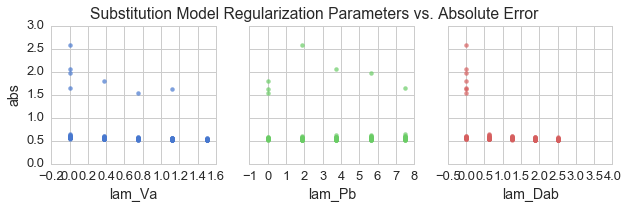

In [91]:
sns.set(font_scale=1.3, style=None, palette='muted')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)

sns.regplot('lam_Va', 'abs', data=sub_data, fit_reg=False, ax=axes[0], scatter_kws={'alpha': 0.7})
sns.regplot('lam_Pb', 'abs', data=sub_data, fit_reg=False, ax=axes[1],scatter_kws={'alpha': 0.7})
sns.regplot('lam_Dab', 'abs', data=sub_data, fit_reg=False, ax=axes[2],scatter_kws={'alpha': 0.7})


axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_ylim(0,3) # There are some outliers with high error, but we don't care about them
fig.suptitle('Substitution Model Regularization Parameters vs. Absolute Error')
plt.tight_layout()

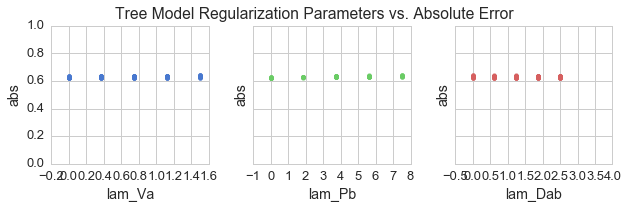

In [92]:
sns.set(font_scale=1.3, style='whitegrid', palette='muted')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)

sns.regplot('lam_Va', 'abs', data=tree_data, fit_reg=False, ax=axes[0], scatter_kws={'alpha': 0.7})
sns.regplot('lam_Pb', 'abs', data=tree_data, fit_reg=False, ax=axes[1],scatter_kws={'alpha': 0.7})
sns.regplot('lam_Dab', 'abs', data=tree_data, fit_reg=False, ax=axes[2],scatter_kws={'alpha': 0.7})

axes[0].set_ylim(0,1) # There are some outliers with high error, but we don't care about them
fig.suptitle('Tree Model Regularization Parameters vs. Absolute Error')
plt.tight_layout()

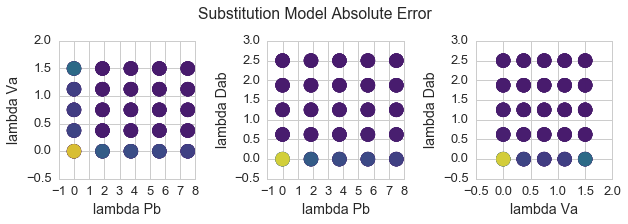

In [63]:
sns.set(font_scale=1.3, style='whitegrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
max_abs = sub_data['abs'].max()
cmap=plt.get_cmap('viridis')
axes[0].scatter(sub_data['lam_Pb'], sub_data['lam_Va'], 
            color=sub_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[0].set_xlabel('lambda Pb')
axes[0].set_ylabel('lambda Va')

axes[1].scatter(sub_data['lam_Pb'], sub_data['lam_Dab'], 
            color=sub_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[1].set_xlabel('lambda Pb')
axes[1].set_ylabel('lambda Dab')

axes[2].scatter(sub_data['lam_Va'], sub_data['lam_Dab'], 
            color=sub_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[2].set_xlabel('lambda Va')
axes[2].set_ylabel('lambda Dab')
fig.suptitle('Substitution Model Absolute Error', y=1.05)

plt.tight_layout()


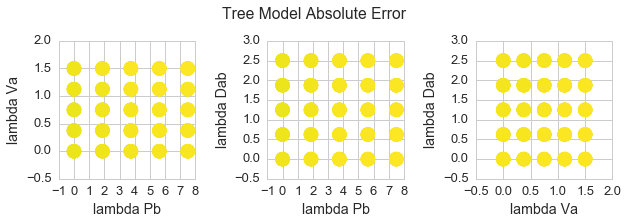

In [66]:
sns.set(font_scale=1.3, style='whitegrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
max_abs = tree_data['abs'].max()

cmap=plt.get_cmap('viridis')
axes[0].scatter(tree_data['lam_Pb'], tree_data['lam_Va'], 
            color=tree_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[0].set_xlabel('lambda Pb')
axes[0].set_ylabel('lambda Va')

axes[1].scatter(tree_data['lam_Pb'], tree_data['lam_Dab'], 
            color=tree_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[1].set_xlabel('lambda Pb')
axes[1].set_ylabel('lambda Dab')

axes[2].scatter(tree_data['lam_Va'], tree_data['lam_Dab'], 
            color=tree_data['abs'].map(lambda x: cmap(x / max_abs)),
           s=200, alpha=0.8)
axes[2].set_xlabel('lambda Va')
axes[2].set_ylabel('lambda Dab')
fig.suptitle('Tree Model Absolute Error', y=1.05)
plt.tight_layout()
